## Preprocessing

In [1]:
# Importing the dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf # commenting out as it only works in GoogleColab
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#  Importing and reading the charity_data.csv stored within gitHub repo
application_df = pd.read_csv("https://raw.githubusercontent.com/i-am-phoenix/Charity_Funding_Predictor-Deep_Learning_NN/main/resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [11]:
# Dropping the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Determining the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [13]:
# Reviewing APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Choosing a cutoff value and creating a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace=[]
cutoff = 500

for app in application_df['APPLICATION_TYPE'].unique():
  count = application_df[application_df['APPLICATION_TYPE'] == app]['APPLICATION_TYPE'].count()
  # count = sub_app['APPLICATION_TYPE'].count()
  print(f"{app}\t\t{count}")
  if count < 500:
    application_types_to_replace.append(app)  
application_types_to_replace

T10		528
T3		27037
T5		1173
T7		725
T4		1542
T6		1216
T2		16
T9		156
T19		1065
T8		737
T13		66
T12		27
T29		2
T25		3
T14		3
T17		1
T15		2


['T2', 'T9', 'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15']

In [15]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C2380        1
C1248        1
C2190        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [90]:
# Looking at CLASSIFICATION value counts >1
temp = []

for cls in application_df['CLASSIFICATION'].unique():
  count = application_df[application_df['CLASSIFICATION'] == cls]['CLASSIFICATION'].count()
  if count> 1 :
    temp.append(cls)
temp

['C1000', 'C2000', 'C3000', 'C1200', 'Other', 'C2100']

In [92]:
# Choosing a cutoff value and creating a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=[]
cutoff = 1000

for cls in application_df['CLASSIFICATION'].unique():
  count = application_df[application_df['CLASSIFICATION'] == cls]['CLASSIFICATION'].count()
  if count < cutoff:
    classifications_to_replace.append(cls)  
  
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Checking to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [93]:
# Converting categorical data to numeric with `pd.get_dummies`
application_df_cat2num = pd.get_dummies(application_df)
application_df_cat2num.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [94]:
# Splitting the preprocessed data into features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns
X = application_df_cat2num.drop(columns=['IS_SUCCESSFUL'])
y = application_df_cat2num['IS_SUCCESSFUL'] 

# Splitting the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [96]:
X_train_scaled.shape

(25724, 43)

## Compile, Train and Evaluate the Model

In [97]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 80)                3520      
_________________________________________________________________
dense_29 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Compiling the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [99]:
# Training the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5719 - accuracy: 0.7207
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7279
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7289
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7314
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7310
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7318
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7321
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7310
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5447 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7403
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7407
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7406
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7399
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7404
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7401
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7404
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7401
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7409
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 

In [100]:
# Evaluating the model using the test data
nn_model_base = nn_model
model_loss_base, model_accuracy_base = nn_model_base.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss_base}, Accuracy: {model_accuracy_base}")

268/268 - 0s - loss: 0.5629 - accuracy: 0.7275
Loss: 0.5629399418830872, Accuracy: 0.7274635434150696


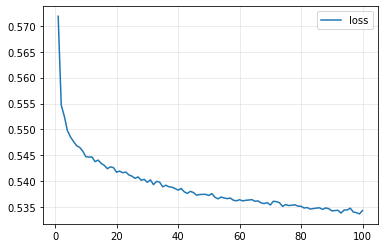

In [101]:
# Create a DataFrame containing training history
history_df_base = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_base.index += 1

# Plot the loss
history_df_base.plot(y = "loss")
plt.grid(alpha=0.3)

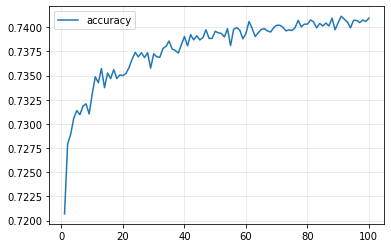

In [102]:
history_df_base.plot(y = "accuracy")
plt.grid(alpha=0.3)

# NN Optimization
Given that implemented NN accuracy is <75%, we next attempt to optimize the hyperparameters of the algorithm

## Option1: 
### Outlier removal

<AxesSubplot:>

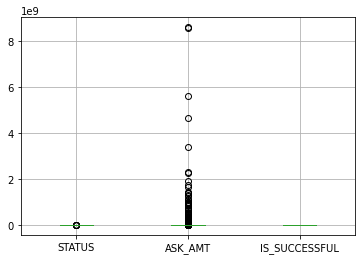

In [103]:
# Reviewing all numerical columns and check for outliers
application_df.boxplot()

In [104]:
# Column ASK_AMT has a very wide spread of values with extremes on teh high side
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [105]:
# Identify outliers using the Q1/Q3 and +-1.5IQR
q1 = application_df['ASK_AMT'].describe()[4]
q3 = application_df['ASK_AMT'].describe()[6]
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print(f"iqr={iqr}\t|\tlower_limit={lower_limit}\t|\tupper_limit={upper_limit}")

iqr=2742.0	|	lower_limit=887.0	|	upper_limit=11855.0


In [106]:
# Filtering out observations with outlier values in ASK_AMT column
application_df_removeoutliers = application_df[(application_df['ASK_AMT'] >= lower_limit) &
                                               (application_df['ASK_AMT'] <= upper_limit)]
application_df_removeoutliers

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [107]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_removeoutliers).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_removeoutliers)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape
(25724, 43)

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 80)                3520      
_________________________________________________________________
dense_32 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7383
Epoch 2/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7444
Epoch 3/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7476
Epoch 4/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5

612/612 [==============================] - 1s 1ms/step - loss: 0.5165 - accuracy: 0.7561
Epoch 75/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5158 - accuracy: 0.7558
Epoch 76/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5159 - accuracy: 0.7555
Epoch 77/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5154 - accuracy: 0.7558
Epoch 78/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5158 - accuracy: 0.7561
Epoch 79/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5153 - accuracy: 0.7559
Epoch 80/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5160 - accuracy: 0.7566
Epoch 81/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5157 - accuracy: 0.7559
Epoch 82/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.7554
Epoch 83/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5158 - accuracy: 

204/204 - 0s - loss: 0.5529 - accuracy: 0.7462
Loss: 0.5529450178146362, Accuracy: 0.7461680173873901


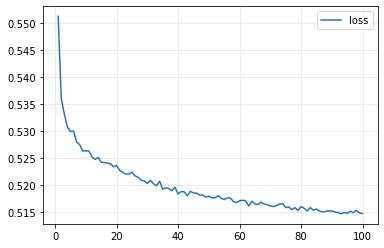

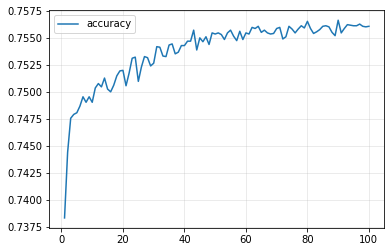

In [110]:
# Evaluate the model using the test data
nn_model_no_out = nn_model
model_loss_no_out, model_accuracy_no_out = nn_model_no_out.evaluate(X_test_scaled,y_test,verbose=2)

print(f"Loss: {model_loss_no_out}, Accuracy: {model_accuracy_no_out}")

# Create a DataFrame containing training history
history_df_no_out = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_no_out.index += 1

# Plot the loss
history_df_no_out.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_no_out.plot(y = "accuracy")
plt.grid(alpha=0.3)

## Option2 
### Remapping income amount to be represented by logical increasing in magnitude value categories

In [111]:
# For INCOME_AMT the categories represent income quantity but since they are labeled as a string, there is no 
# explicit reconition of the magnitude increase
# I am suggesting to remap the column to integer values
#
#	0	-	0
#	1	-	Jan-99
#	2	-	10000-24999
#	3	-	25000-99999
#	4	-	100000-499999
#	5	-	1M-5M
#	6	-	5M-10M
#	7	-	10M-50M
#	8	-	50M+

income_amt_dict = {
    '0':0,
    '1-9999':1,
    '10000-24999':2,
    '25000-99999':3,
    '100000-499999':4,
    '':'',
    '1M-5M':5,
    '5M-10M':6,
    '10M-50M':7,
    '50M+':8
}
application_df_remap = application_df
application_df_remap = application_df_remap.replace(income_amt_dict)
# application_df_remap = application_df_remap['INCOME_AMT'].map(income_amt_dict)
application_df_remap['INCOME_AMT'].value_counts()

0    24388
3     3747
4     3374
5      955
1      728
2      543
7      240
6      185
8      139
Name: INCOME_AMT, dtype: int64

In [112]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_remap).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_remap)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape
(25724, 43)

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 80)                2880      
_________________________________________________________________
dense_35 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 31        
Total params: 5,341
Trainable params: 5,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5679 - accuracy: 0.7236
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.7291
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7284
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5

804/804 [==============================] - 1s 1ms/step - loss: 0.5400 - accuracy: 0.7359
Epoch 74/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7365
Epoch 75/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7367
Epoch 76/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.7363
Epoch 77/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5395 - accuracy: 0.7374
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5396 - accuracy: 0.7365
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.7367
Epoch 80/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7366
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5392 - accuracy: 0.7371
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5396 - accuracy: 

268/268 - 0s - loss: 0.5567 - accuracy: 0.7286
Loss: 0.5567317605018616, Accuracy: 0.7286297082901001


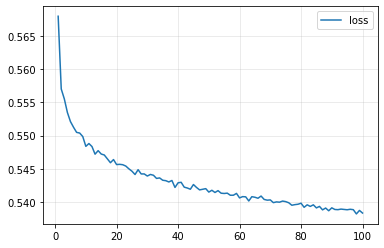

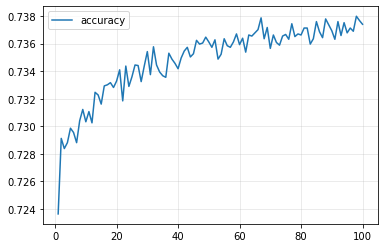

In [113]:
# Evaluate the model using the test data
nn_model_remap = nn_model
model_loss_remap, model_accuracy_remap = nn_model_remap.evaluate(X_test_scaled,y_test,verbose=2)

print(f"Loss: {model_loss_remap}, Accuracy: {model_accuracy_remap}")

# Create a DataFrame containing training history
history_df_remap = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_remap.index += 1

# Plot the loss
history_df_remap.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_remap.plot(y = "accuracy")
plt.grid(alpha=0.3)

## Option 3:
### Removing outliers and remapping (at the same time)

In [114]:
# Filter out observations with outlier values in ASK_AMT column
application_df_removeoutliers_remap = application_df_remap[(application_df_remap['ASK_AMT'] >= lower_limit) &
                                               (application_df_remap['ASK_AMT'] <= upper_limit)]
# application_df_removeoutliers_remap

# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_removeoutliers_remap).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_removeoutliers_remap)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape
(25724, 43)

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 80)                2880      
_________________________________________________________________
dense_38 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 31        
Total params: 5,341
Trainable params: 5,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7404
Epoch 2/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7464
Epoch 3/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7477
Epoch 4/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5

612/612 [==============================] - 1s 1ms/step - loss: 0.5189 - accuracy: 0.7538
Epoch 74/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5188 - accuracy: 0.7545
Epoch 75/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5185 - accuracy: 0.7550
Epoch 76/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5187 - accuracy: 0.7541
Epoch 77/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5186 - accuracy: 0.7539
Epoch 78/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5179 - accuracy: 0.7549
Epoch 79/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5188 - accuracy: 0.7548
Epoch 80/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5182 - accuracy: 0.7541
Epoch 81/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5184 - accuracy: 0.7538
Epoch 82/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5182 - accuracy: 

204/204 - 0s - loss: 0.5477 - accuracy: 0.7439
Loss: 0.5476731061935425, Accuracy: 0.7438687682151794


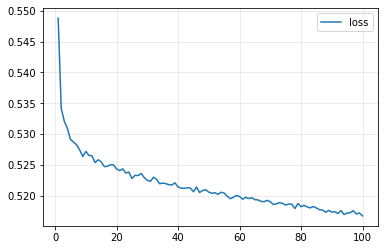

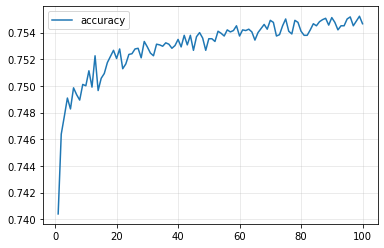

In [115]:
# Evaluate the model using the test data
nn_model_no_out_remap = nn_model
model_loss_no_out_remap, model_accuracy_no_out_remap = nn_model_no_out_remap.evaluate(X_test_scaled,y_test,verbose=2)

print(f"Loss: {model_loss_no_out_remap}, Accuracy: {model_accuracy_no_out_remap}")

# Create a DataFrame containing training history
history_df_no_out_remap = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_no_out_remap.index += 1

# Plot the loss
history_df_no_out_remap.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_no_out_remap.plot(y = "accuracy")
plt.grid(alpha=0.3)

## Option 4:
### Removing outliers and reduce size of the 1st and hidden layers

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 43)                1892      
_________________________________________________________________
dense_41 (Dense)             (None, 15)                660       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 16        
Total params: 2,568
Trainable params: 2,568
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7362
Epoch 2/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7463
Epoch 3/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7476
Epoch 4/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5

612/612 [==============================] - 1s 1ms/step - loss: 0.5179 - accuracy: 0.7548
Epoch 74/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5177 - accuracy: 0.7546
Epoch 75/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5180 - accuracy: 0.7540
Epoch 76/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7541
Epoch 77/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5177 - accuracy: 0.7537
Epoch 78/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7546
Epoch 79/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5172 - accuracy: 0.7541
Epoch 80/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5176 - accuracy: 0.7548
Epoch 81/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7552
Epoch 82/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5175 - accuracy: 

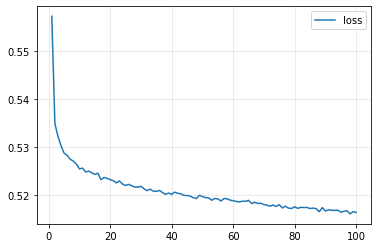

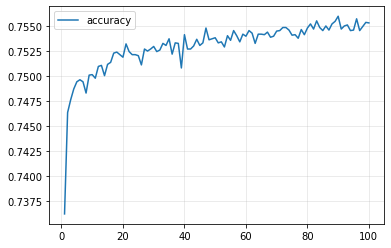

In [116]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_removeoutliers).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_removeoutliers)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss_no_out_unitless, model_accuracy_no_out_unitless = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

nn_model_no_out_unitless = nn_model

print(f"Loss: {model_loss_no_out_unitless}, Accuracy: {model_accuracy_no_out_unitless}")

# Create a DataFrame containing training history
history_df_no_out_unitless = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_no_out_unitless.index += 1

# Plot the loss
history_df_no_out_unitless.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_no_out_unitless.plot(y = "accuracy")
plt.grid(alpha=0.3)

## Option 5:
### Removing outliers and increasing size of the 1st and hidden layers

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 43)                1892      
_________________________________________________________________
dense_44 (Dense)             (None, 15)                660       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 16        
Total params: 2,568
Trainable params: 2,568
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5715 - accuracy: 0.7256
Epoch 2/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7463
Epoch 3/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7470
Epoch 4/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5

612/612 [==============================] - 1s 1ms/step - loss: 0.5178 - accuracy: 0.7548
Epoch 74/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5181 - accuracy: 0.7539
Epoch 75/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5178 - accuracy: 0.7550
Epoch 76/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5178 - accuracy: 0.7553
Epoch 77/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5175 - accuracy: 0.7545
Epoch 78/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5177 - accuracy: 0.7544
Epoch 79/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5180 - accuracy: 0.7546
Epoch 80/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5173 - accuracy: 0.7545
Epoch 81/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5169 - accuracy: 0.7550
Epoch 82/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5174 - accuracy: 

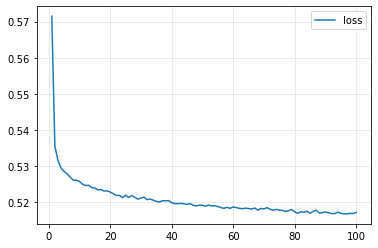

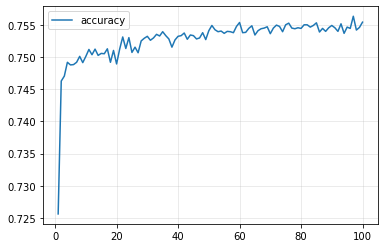

In [117]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_removeoutliers).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_removeoutliers)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss_no_out_unitmore, model_accuracy_no_out_unitmore = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

nn_model_no_out_unitmore = nn_model

print(f"Loss: {model_loss_no_out_unitmore}, Accuracy: {model_accuracy_no_out_unitmore}")

# Create a DataFrame containing training history
history_df_no_out_unitmore = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_no_out_unitmore.index += 1

# Plot the loss
history_df_no_out_unitmore.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_no_out_unitmore.plot(y = "accuracy")
plt.grid(alpha=0.3)

## Option 6:
### Removing outliers and increasing number of hidden layers

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 80)                3520      
_________________________________________________________________
dense_22 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_23 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 16        
Total params: 6,431
Trainable params: 6,431
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7354: 0s - loss: 0.5684 
Epoch 2/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7472
Epoch 3/100
612/612 [=======

612/612 [==============================] - 1s 1ms/step - loss: 0.5154 - accuracy: 0.7558
Epoch 73/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5153 - accuracy: 0.7559
Epoch 74/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.7559
Epoch 75/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5157 - accuracy: 0.7557
Epoch 76/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 0.7552
Epoch 77/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5154 - accuracy: 0.7551
Epoch 78/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5153 - accuracy: 0.7556
Epoch 79/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.7560
Epoch 80/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5153 - accuracy: 0.7558
Epoch 81/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5151 - accuracy: 

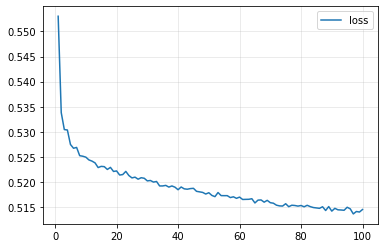

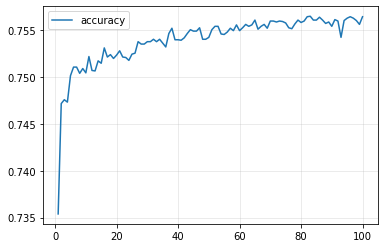

In [51]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_removeoutliers).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_removeoutliers)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss_no_out_3hl, model_accuracy_no_out_3hl = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

nn_model_no_out_3hl = nn_model

print(f"Loss: {model_loss_no_out_3hl}, Accuracy: {model_accuracy_no_out_3hl}")

# Create a DataFrame containing training history
history_df_no_out_3hl = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_no_out_3hl.index += 1

# Plot the loss
history_df_no_out_3hl.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_no_out_3hl.plot(y = "accuracy")
plt.grid(alpha=0.3)

## Option 7:
### Removing outliers and changing activation function from RELU to TANH

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 80)                3520      
_________________________________________________________________
dense_47 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5569 - accuracy: 0.7354
Epoch 2/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5379 - accuracy: 0.7441
Epoch 3/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7456
Epoch 4/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5

612/612 [==============================] - 1s 1ms/step - loss: 0.5135 - accuracy: 0.7553
Epoch 74/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5135 - accuracy: 0.7563
Epoch 75/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5133 - accuracy: 0.7560
Epoch 76/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5133 - accuracy: 0.7562
Epoch 77/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5132 - accuracy: 0.7565
Epoch 78/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5131 - accuracy: 0.7567
Epoch 79/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5132 - accuracy: 0.7559
Epoch 80/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5130 - accuracy: 0.7561
Epoch 81/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5129 - accuracy: 0.7570
Epoch 82/100
612/612 [==============================] - 1s 1ms/step - loss: 0.5130 - accuracy: 

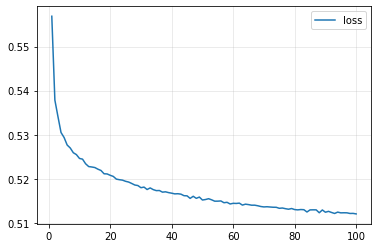

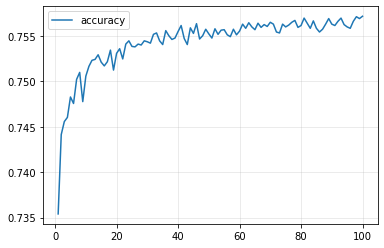

In [118]:
# Split our preprocessed data into our features and target arrays
# Target - "IS_SUCCESSFUL"
# features - remaining columns

X = pd.get_dummies(application_df_removeoutliers).drop(columns=['IS_SUCCESSFUL'])
y = pd.get_dummies(application_df_removeoutliers)['IS_SUCCESSFUL'] 

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape

# Compile, Train and Evaluate the Model
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh", input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss_no_out_tanh, model_accuracy_no_out_tanh = nn_model.evaluate(X_test_scaled,y_test,verbose=2)

nn_model_no_out_tanh = nn_model

print(f"Loss: {model_loss_no_out_tanh}, Accuracy: {model_accuracy_no_out_tanh}")

# Create a DataFrame containing training history
history_df_no_out_tanh = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df_no_out_tanh.index += 1

# Plot the loss
history_df_no_out_tanh.plot(y = "loss")
plt.grid(alpha=0.3)

history_df_no_out_tanh.plot(y = "accuracy")
plt.grid(alpha=0.3)

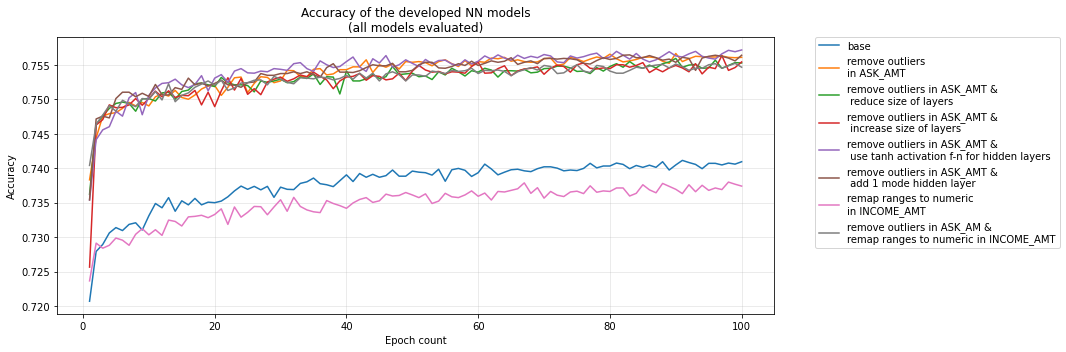

In [119]:
#  Plotting accuracy of All sensitivity runs
plt.figure(figsize=(15,5))
plt.plot(history_df_base['accuracy'], label='base')
plt.plot(history_df_no_out['accuracy'], label='remove outliers\nin ASK_AMT')
plt.plot(history_df_no_out_unitless['accuracy'], label='remove outliers in ASK_AMT &\n reduce size of layers')
plt.plot(history_df_no_out_unitmore['accuracy'], label='remove outliers in ASK_AMT &\n increase size of layers')
plt.plot(history_df_no_out_tanh['accuracy'], label='remove outliers in ASK_AMT &\n use tanh activation f-n for hidden layers')
plt.plot(history_df_no_out_3hl['accuracy'], label='remove outliers in ASK_AMT &\n add 1 mode hidden layer')
plt.plot(history_df_remap['accuracy'], label='remap ranges to numeric\nin INCOME_AMT')
plt.plot(history_df_no_out_remap['accuracy'], label='remove outliers in ASK_AM &\nremap ranges to numeric in INCOME_AMT')

plt.title("Accuracy of the developed NN models\n(all models evaluated)")
plt.xlabel("Epoch count")
plt.ylabel("Accuracy")

plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.02))
plt.tight_layout()

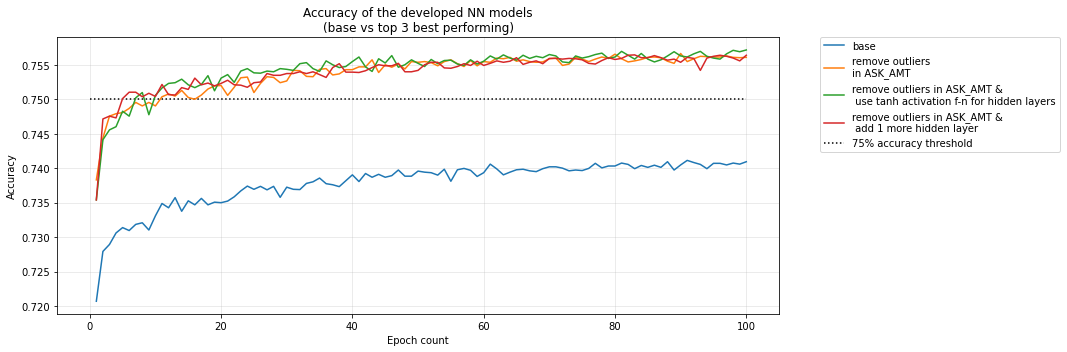

In [127]:
#  Plotting accuracy of best sensitivity runs
plt.figure(figsize=(15,5))
plt.plot(history_df_base['accuracy'], label='base')
plt.plot(history_df_no_out['accuracy'], label='remove outliers\nin ASK_AMT')
# plt.plot(history_df_no_out_unitless['accuracy'], label='remove outliers in ASK_AMT &\n reduce size of layers')
# plt.plot(history_df_no_out_unitmore['accuracy'], label='remove outliers in ASK_AMT &\n increase size of layers')
plt.plot(history_df_no_out_tanh['accuracy'], label='remove outliers in ASK_AMT &\n use tanh activation f-n for hidden layers')
plt.plot(history_df_no_out_3hl['accuracy'], label='remove outliers in ASK_AMT &\n add 1 more hidden layer')
# plt.plot(history_df_remap['accuracy'], label='remap ranges to numeric\nin INCOME_AMT')
# plt.plot(history_df_no_out_remap['accuracy'], label='remove outliers in ASK_AM &\nremap ranges to numeric in INCOME_AMT')
plt.hlines(0.75,0,100, colors='k', linestyles=':', label="75% accuracy threshold")

plt.title("Accuracy of the developed NN models\n(base vs top 3 best performing)")
plt.xlabel("Epoch count")
plt.ylabel("Accuracy")

plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1.02))
plt.tight_layout()

plt.savefig("images/best_models_accuracy.png")

In [121]:
# Exporting the models to HDF5 file
nn_model_base.save("charity_pred_trained_base.h5")
nn_model_no_out.save("charity_pred_trained_no_out.h5")
# nn_model_remap.save("charity_pred_trained_remap.h5")
# nn_model_no_out_remap.save("charity_pred_trained_no_out_remap.h5")
nn_model_no_out_tanh.save("charity_pred_trained_no_out_tanh.h5") 
nn_model_no_out_3hl.save("charity_pred_trained_no_out_3hl.h5")

In [122]:
losses = [ model_loss_base, model_loss_no_out, model_loss_no_out_tanh, model_loss_no_out_3hl]
accuracy = [ model_accuracy_base, model_accuracy_no_out, model_accuracy_no_out_tanh, model_accuracy_no_out_3hl]

In [123]:
losses

[0.5629399418830872,
 0.5529450178146362,
 0.5439870357513428,
 0.5522093176841736]

In [124]:
accuracy

[0.7274635434150696,
 0.7461680173873901,
 0.7467811107635498,
 0.7458614110946655]

In [126]:
pd.DataFrame({
    "description": ["base", "removed outliers (RO)", "RO & tanh activation", "RO & 1 extra hidden layer"],
    "loss": losses,
    "accuracy": accuracy
}).set_index('description')

,loss,accuracy
description,,
base,0.562940,0.727464
removed outliers (RO),0.552945,0.746168
RO & tanh activation,0.543987,0.746781
RO & 1 extra hidden layer,0.552209,0.745861
